In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_table("w_logret_3stocks.txt", index_col=0)
data = data.drop("Unnamed: 1", axis=1)
squared_data = np.square(data)
n = data.shape[0]
#data

### Part (a)

In [3]:
mean = data.mean()
mean

Citi    0.001381
PFE     0.001258
GM      0.000594
dtype: float64

In [4]:
variance = data.var()
variance

Citi    0.000372
PFE     0.000277
GM      0.000328
dtype: float64

In [5]:
skewness = data.skew() # uses n-1 for unbiased estimate
skewness

## testing if manual skewness is the same as the one given by pandas
# skew_sum = 0
# for i in range(data.shape[0]):
#     skew_sum += ((data.iloc[i]['PFE'] - mean[1])**3)/(variance[1]**(3/2))
# skewness_manual = skew_sum/data.shape[0]
# skewness_manual
## -> -0.2608524784684341 (no vast difference)

Citi   -0.367898
PFE    -0.261445
GM     -0.151064
dtype: float64

In [6]:
kurtosis = data.kurtosis() # uses n-1 for unbiased estimate
kurtosis # excess kurtosis

Citi    5.615848
PFE     1.549672
GM      2.338448
dtype: float64

In [7]:
# Ljung-Box Statistic
acf = []
for column in data:
    autocorr = []
    for h in range(10):
        autocorr.append(data[column].autocorr(lag=h+1))
    acf.append(autocorr)
lb = {'Citi':[], 'PFE':[], 'GM':[]}
for i in range(3):
    lb_stat = 0
    for h in range(10):
        lb_stat += (acf[i][h]**2)/(n-(h+1))
        lb[data.columns[i]].append(n*(n+2)*lb_stat)
pd.DataFrame.from_dict(lb).style.hide_index()

Citi,PFE,GM
7.650340,7.076381,1.250814
12.333451,7.079616,2.739398
12.420810,8.753695,3.422213
12.995373,8.760544,4.156535
13.056809,10.054021,4.189286
14.065221,10.337820,9.470064
17.787627,10.368977,9.914055
18.973957,14.321777,12.711584
20.075136,14.793797,13.260082
20.433916,14.820500,13.394766


### Part (b)

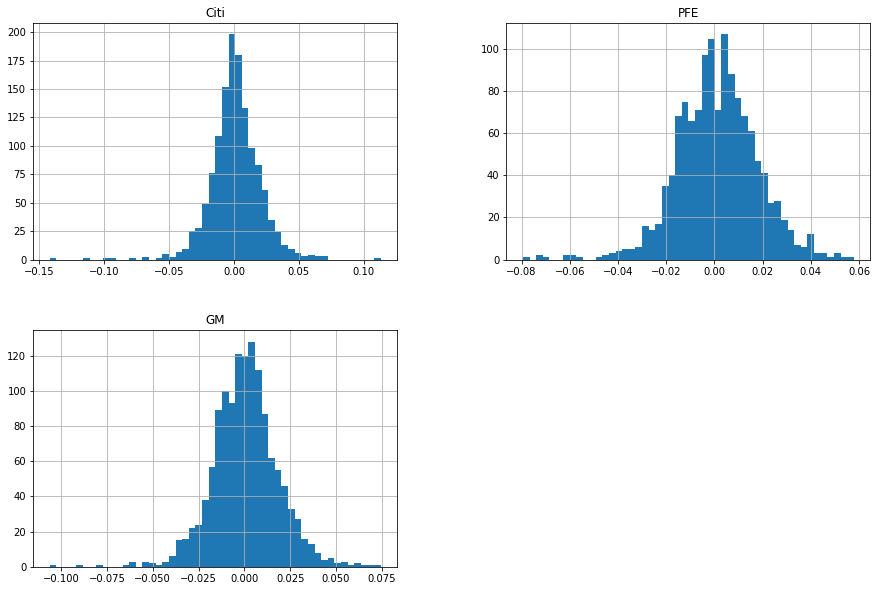

In [8]:
data.hist(bins=50, figsize =(15,10));

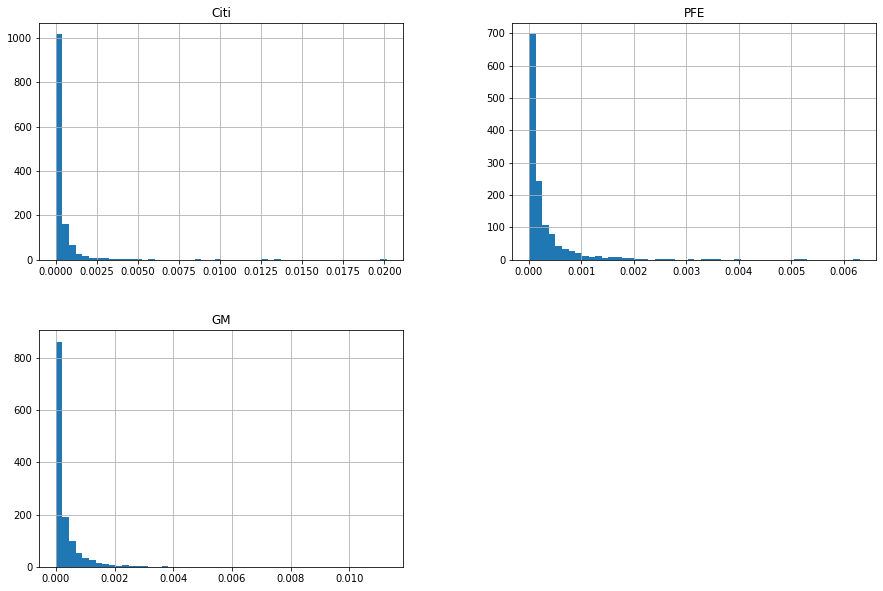

In [9]:
squared_data.hist(bins=50, figsize=(15,10));

### Part (c)

In [10]:
# Jarque-Bera test
jb = []
sksq = []
ksq = []
for i in range(3):
    jb_statistic = n*((skewness[i]**2)/6 + ((kurtosis[i])**2)/24)
    jb.append(jb_statistic)
jb

[1769.6994044329408, 147.56509333074317, 306.70572576014456]

Clearly, all the values far exceed 5.99, the 95th percentile of the $\chi^2_2$-distribution. We can reject the null of normality.

### Part (d)

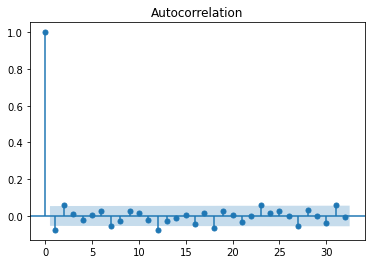

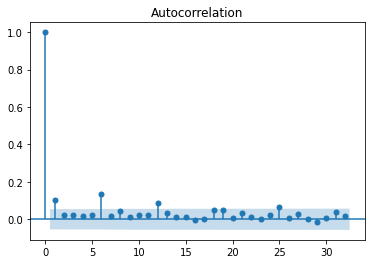

In [11]:
plot_acf(data['Citi']);
plot_acf(squared_data['Citi']);

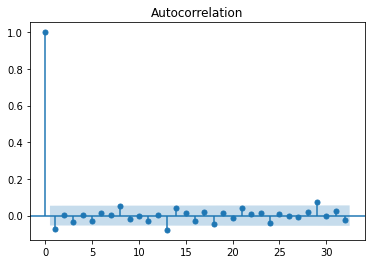

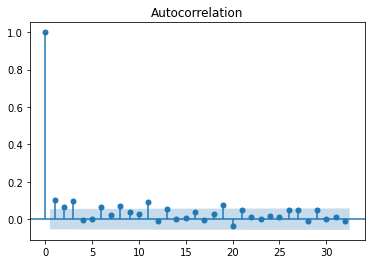

In [12]:
plot_acf(data['PFE']);
plot_acf(squared_data['PFE']);

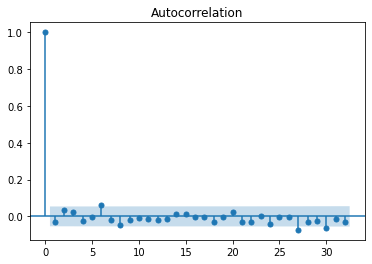

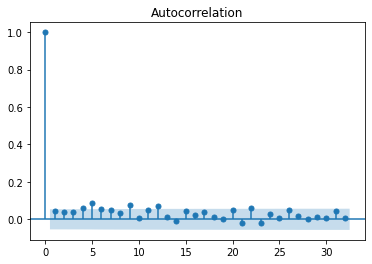

In [13]:
plot_acf(data['GM']);
plot_acf(squared_data['GM']);

Comparing with lag 0, we can see that the ACF values fall quickly for lag values greater than or equal to 1. Also, for all the ACF plots, the squared returns (bottom) have much larger autocorrelations as compared to the returns (top) themselves. This can be explained by volatility clustering - large changes tend to be followed by large changes, of either sign, and small changes tend to be followed by small changes.